In this example we will take a small set of colors in the RGB space and use the intensity values to train a SOM. After the som is trained we will plot the map coloring each neuron using its weights as RGB coordinates.

Let's first define our colors:

In [1]:
from minisom_gpu.som import MiniSom
import torch

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

device = 'cuda'

#Training inputs for RGBcolors
colors = torch.tensor(np.array([[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]), dtype=torch.float32, device=device)
color_names = \
    ['black', 'blue', 'darkblue', 'skyblue',
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey']

Let's initialize our SOM and plot the colors without training:

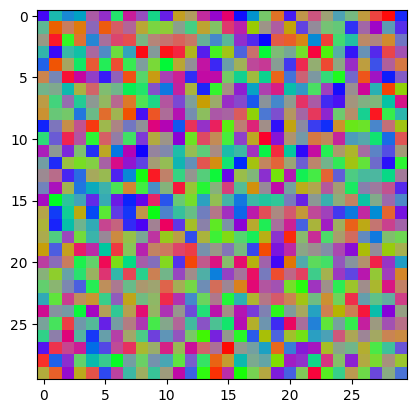

In [2]:
som = MiniSom(30, 30, 3, sigma=3., 
              learning_rate=2.5, 
              neighborhood_function='gaussian', random_seed=0, device=device)

plt.imshow(abs(som.get_weights().cpu().numpy()), interpolation='none')

We can now train the SOM and check how the organization of the weights has changed:

 [ 500 / 500 ] 100% - 0:00:00 left 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 quantization error: tensor(2.9913e-05)


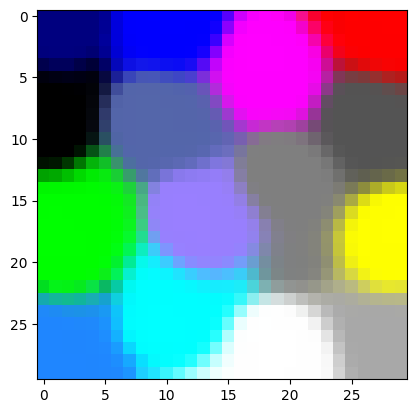

In [3]:
som.train(colors, 500, random_order=True, verbose=True)

plt.imshow(abs(som.get_weights().cpu().numpy()), interpolation='none')

Using a different neighborhood function the weights be less smooth across the map:

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: tensor(6.1807e-05)


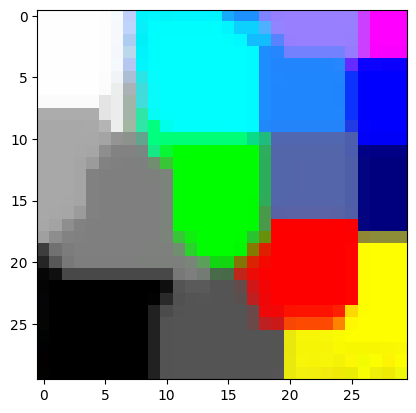

In [4]:
som = MiniSom(30, 30, 3, sigma=8., 
              learning_rate=.5, 
              neighborhood_function='bubble', random_seed=0, device=device)
som.train_random(colors, 500, verbose=True)

plt.imshow(abs(som.get_weights().cpu().numpy()), interpolation='none')